In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [156]:
# Cargar los datos en un DF pero sin cabecera
df = pd.read_csv('data_evaluacion.csv', header=None)

In [157]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [158]:
# Asignar nombres a las columnas de manera genérica y secuencial
df.columns = [f'Columna{i+1}' for i in range(df.shape[1])]
df.head()

,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,Columna13,Columna14,Columna15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Columna1   48842 non-null  int64 
 1   Columna2   48842 non-null  object
 2   Columna3   48842 non-null  int64 
 3   Columna4   48842 non-null  object
 4   Columna5   48842 non-null  int64 
 5   Columna6   48842 non-null  object
 6   Columna7   48842 non-null  object
 7   Columna8   48842 non-null  object
 8   Columna9   48842 non-null  object
 9   Columna10  48842 non-null  object
 10  Columna11  48842 non-null  int64 
 11  Columna12  48842 non-null  int64 
 12  Columna13  48842 non-null  int64 
 13  Columna14  48842 non-null  object
 14  Columna15  48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [160]:
df.nunique()

Columna1        74
Columna2         9
Columna3     28523
Columna4        16
Columna5        16
Columna6         7
Columna7        15
Columna8         6
Columna9         5
Columna10        2
Columna11      123
Columna12       99
Columna13       96
Columna14       42
Columna15        2
dtype: int64

In [161]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'Columna1': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
        54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
        46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
        26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
        83, 84, 85, 86, 87, 89], dtype=int64),
 'Columna2': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'Columna3': array([ 77516,  83311, 215646, ..., 173449,  89686, 350977], dtype=int64),
 'Columna4': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'Columna5': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
       dtype=int64),
 'Columna6': array(['Never-marrie

In [162]:
nombres_columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                    'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                    'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary']
df.columns = nombres_columnas
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [163]:
df.replace('?', np.nan, inplace=True)
df.dropna(how='any', inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  country         45222 non-null  object
 14  salary          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [165]:
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country', 'salary']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


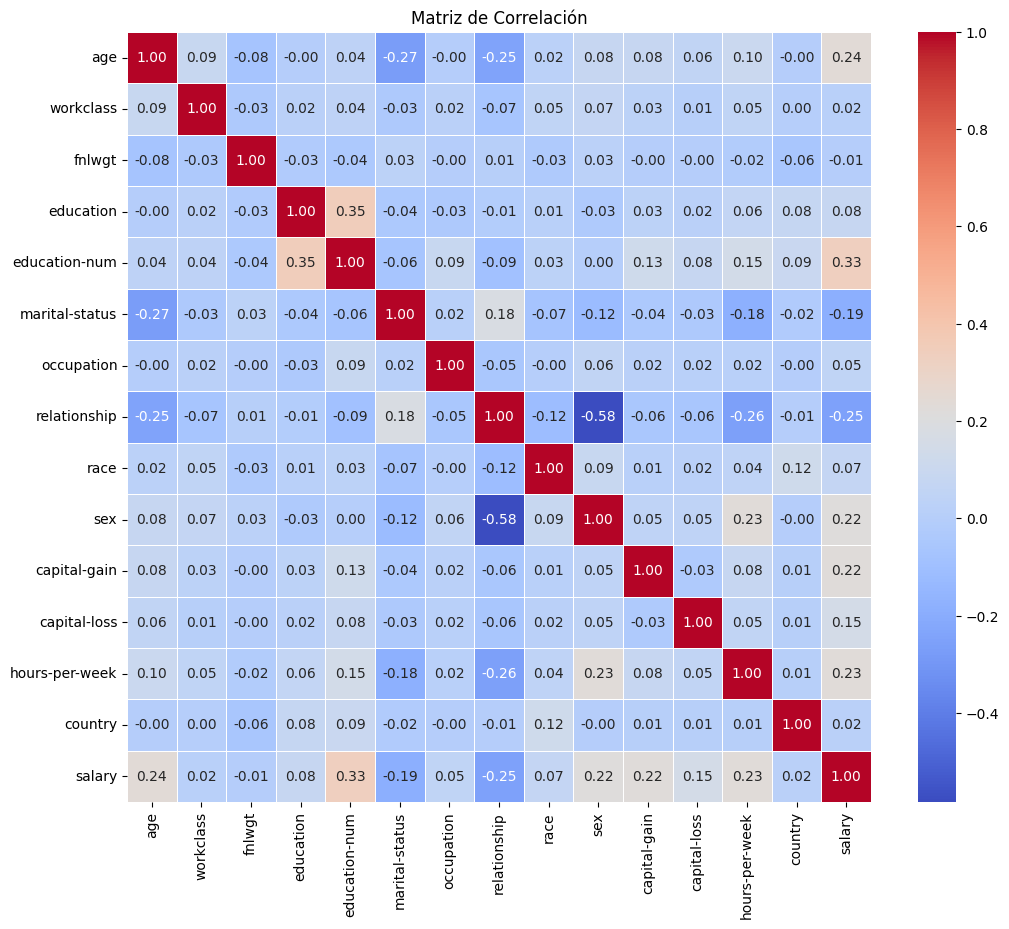

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [167]:
df.to_csv("data_evaluacion_Limpio.csv") 

In [168]:
X = df.drop('salary', axis=1)
y = df['salary']
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,245211,9,13,4,9,3,4,1,0,0,40,38
48837,39,2,215419,9,13,0,9,1,4,0,0,0,36,38
48839,38,2,374983,9,13,2,9,0,4,1,0,0,50,38
48840,44,2,83891,9,13,0,0,3,1,1,5455,0,40,38
